<a href="https://colab.research.google.com/github/vibhor2mathur/Kaggle/blob/main/WineQualityPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Relevent Libraries 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option('display.max_rows', None)

In [5]:
#while True:pass


In [6]:
dataset=pd.read_csv('winequalityN.csv')
pd.pandas.set_option('display.max_columns',None)

# dataset Exploration 

In [7]:
dataset.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

## Check for Null Values
 

In [8]:
dataset.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [9]:
dataset_na=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1]
dataset_na

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'pH',
 'sulphates']

In [10]:
dataset['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


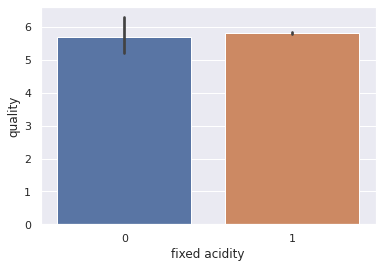

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


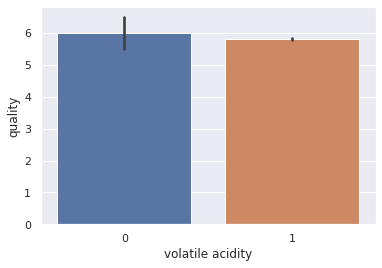

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


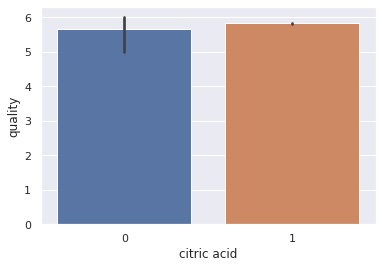

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


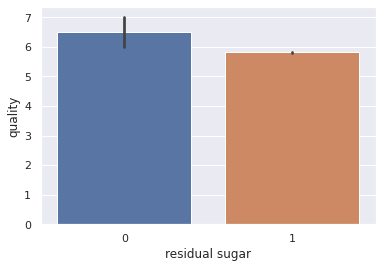

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


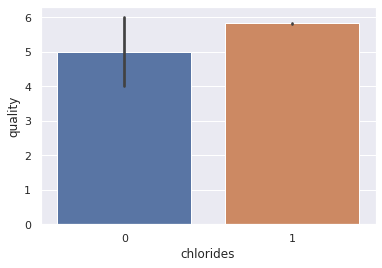

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


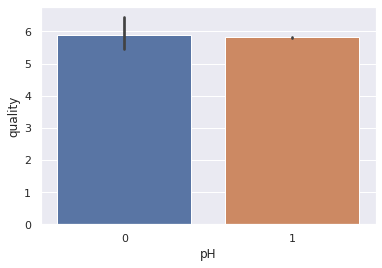

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


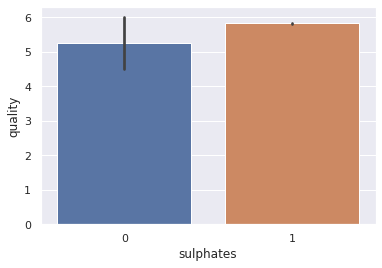

In [11]:
for feature in dataset_na:
  data=dataset.copy()
  data[feature]=np.where(data[feature].isnull(),0,1)
  sns.barplot(data[feature],data['quality'])
  #data.groupby(feature)['quality'].median().plot.bar()
  plt.show()


## Check for numerical dataset 

In [12]:
dataset_num=[feature for feature in dataset.columns if dataset[feature].dtypes!='O']
dataset_num

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

## Line Plot 

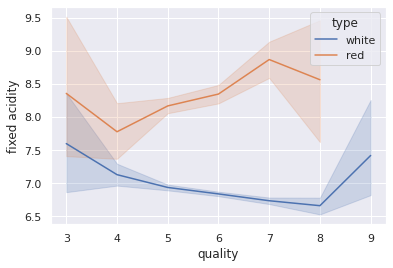

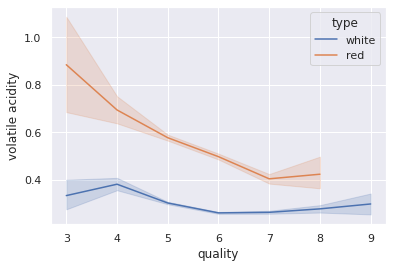

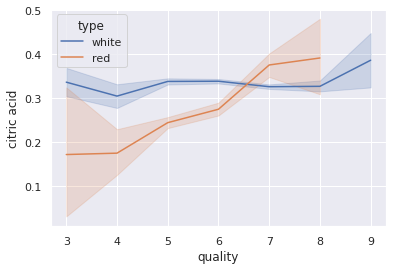

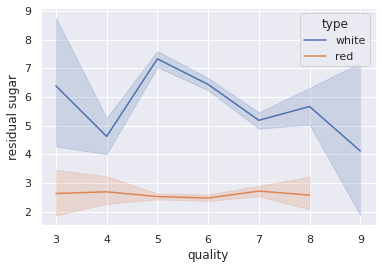

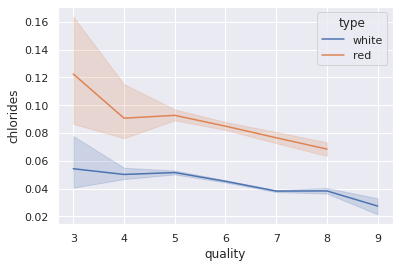

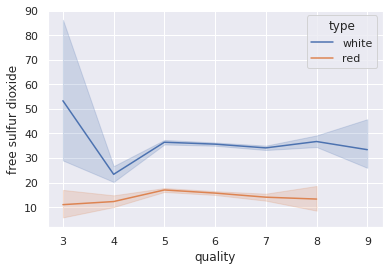

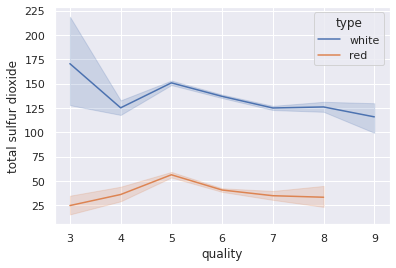

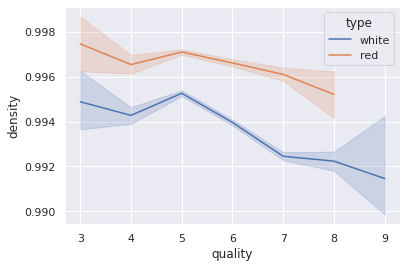

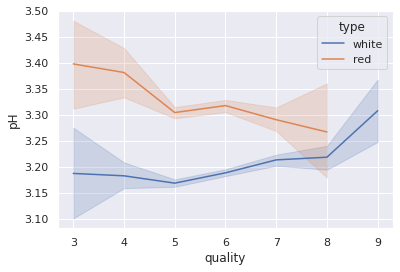

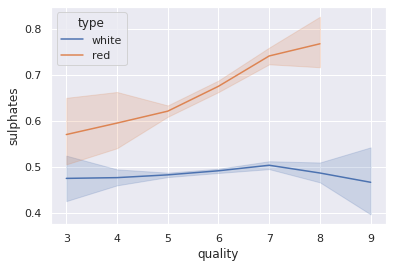

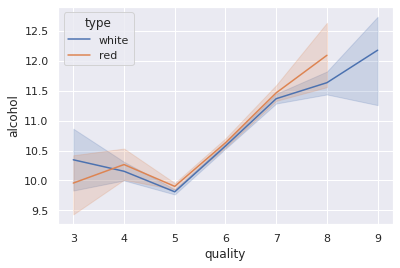

In [13]:
for feature in dataset_num:
  data=dataset.copy()
  if feature not in ['quality']:
    sns.lineplot(x='quality',y=feature,data=data,hue='type')
    plt.show()

**Acidity and Ph:** Red wine is expected to have have high content of fixed acidity and volatile acidity as compared to white wine for better quality only expection being citric acidity and also less Ph.

**Sugar:** Residual sugar is much higher in white wine compared to red and also sugar quantity is lesser in better quality wines.

**Chlorides:** Found more content in poor quality wines and more in red wine.
density: Red wine is more denser than white and density is less as we move to high quality wines.

**Sulphates:** In case of red wines as sulphates are more in better quality wines but it is opposite for white wine.

**Alcohol:** No surprises more the content of alcohol much better is your drink ;) 



****

##BoxPlot

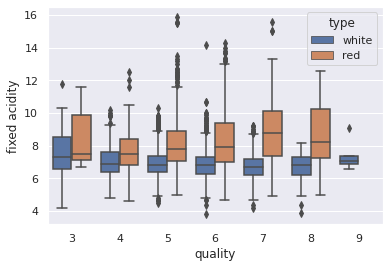

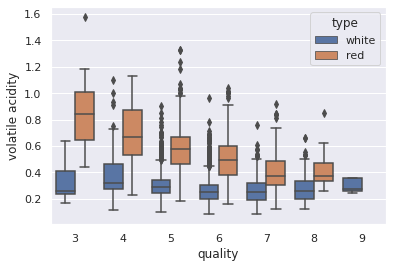

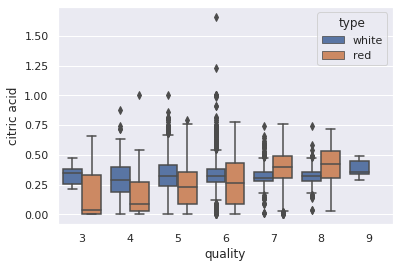

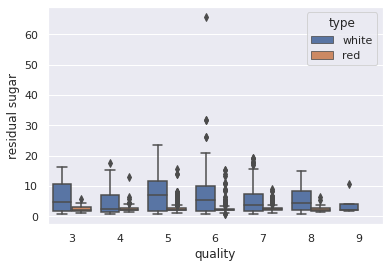

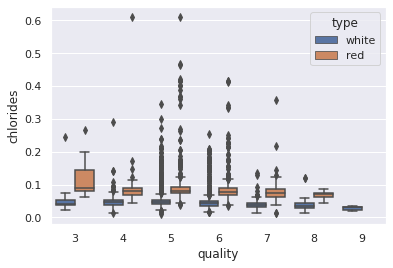

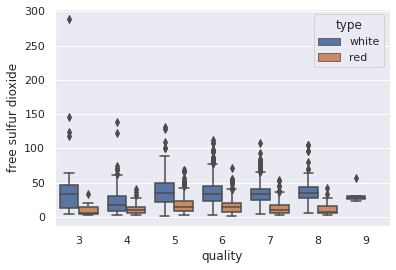

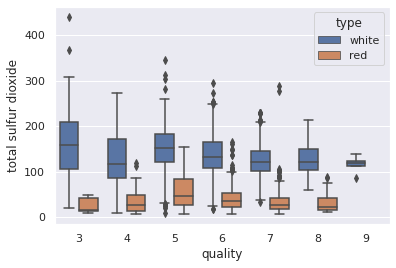

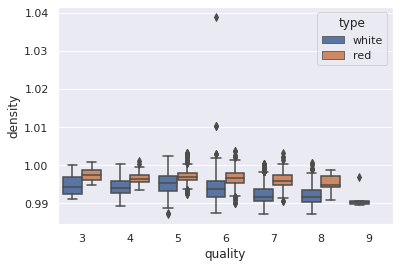

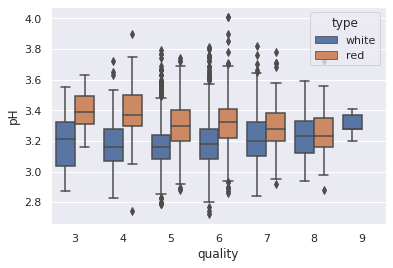

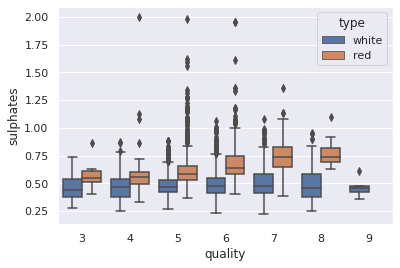

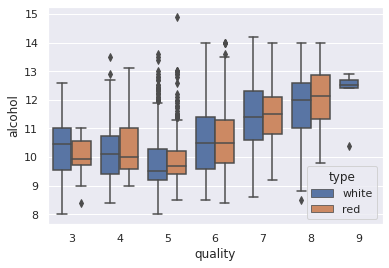

In [14]:
for feature in dataset_num:
  data=dataset.copy()
  if feature not in ['quality']:
    sns.boxplot(x='quality',y=feature,data=data,hue='type')
    plt.show()

**Note 1: As we can see that there is no condition with quality 9 and type white so we need to cross check that**

**Note 2: There are lot of outliers in our data**

In [15]:
dataset.loc[(dataset['type']=='red') & (dataset['quality']==9)]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


**So it is confirmed that there is no red wine with 9 quality**

## Violen Plot 

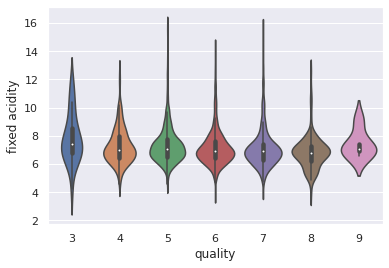

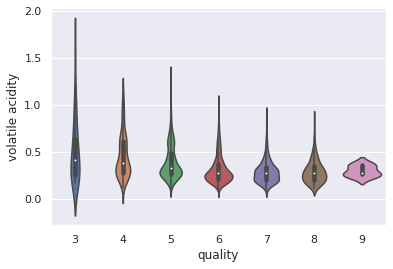

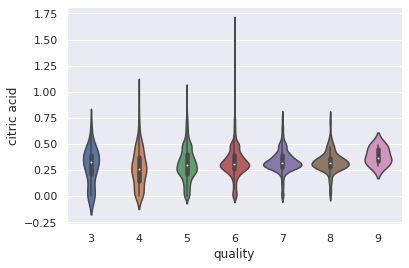

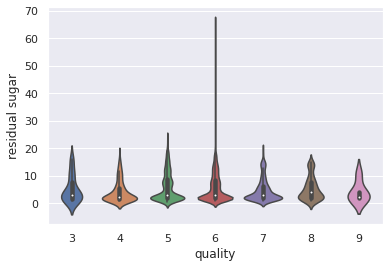

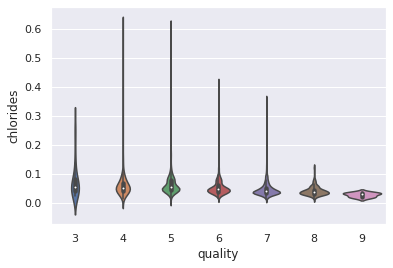

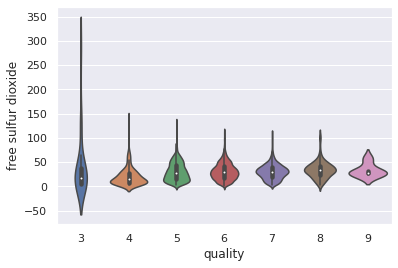

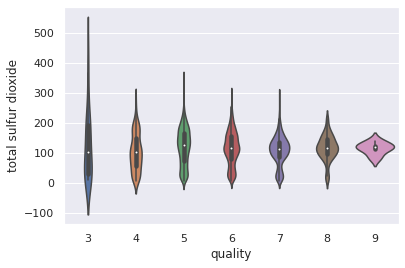

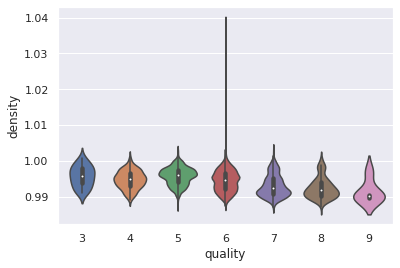

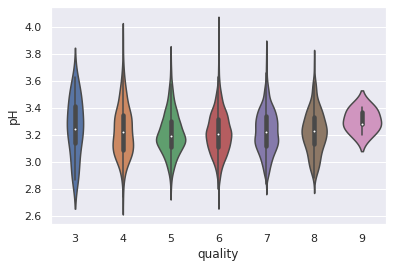

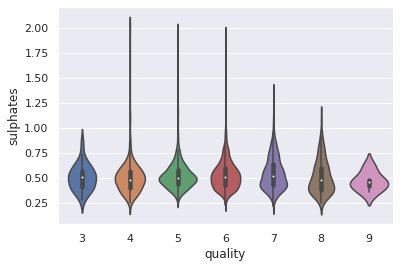

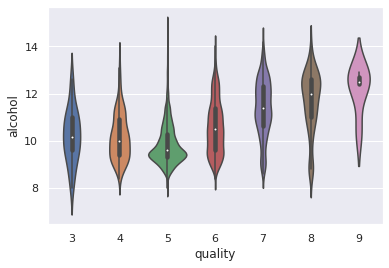

In [16]:
for feature in dataset_num:
  data=dataset.copy()
  if feature not in ['quality']:
    sns.violinplot(x='quality',y=feature,data=data)
    plt.show()

## Continous Variables 

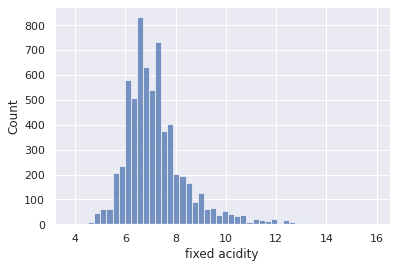

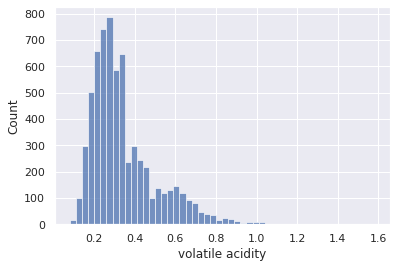

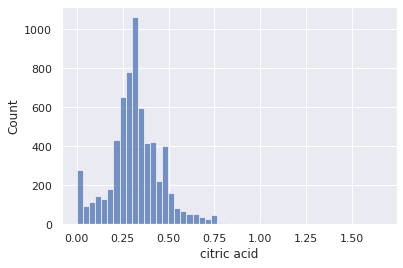

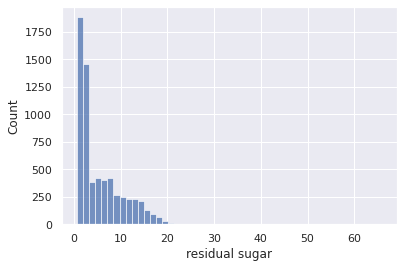

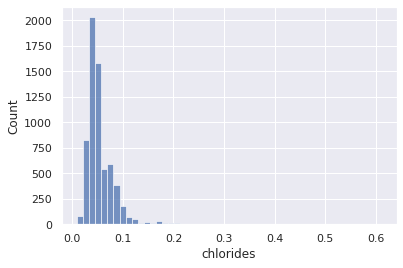

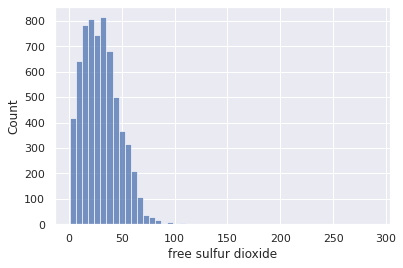

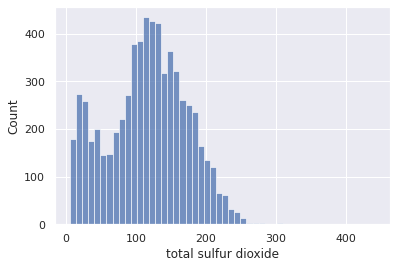

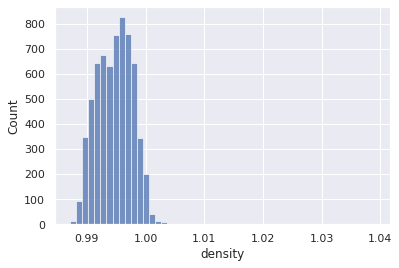

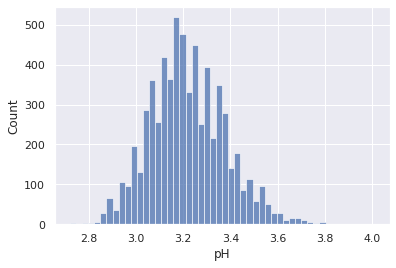

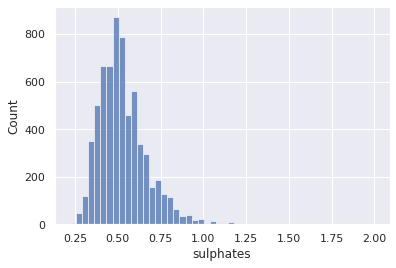

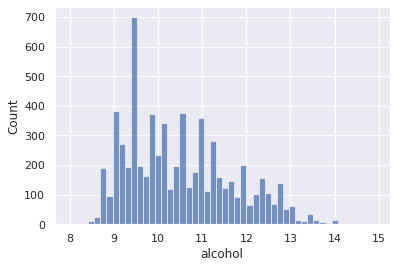

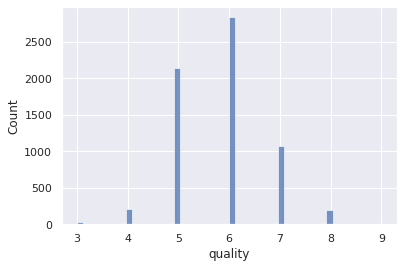

In [17]:
for feature in dataset_num:
  dataset=data.copy()
  sns.histplot(x=feature,data=data,bins=50)
  plt.show()

**Quality :** Poor quality and Good quality wines are scrarse and average are available in abundance proper *normal distribution*.

Most of the data is *normally distributed*.
But features are skewed so it needs to be removed

## Checking if any categorical features 

In [18]:
dataset_cat=[feature for feature in dataset.columns if dataset[feature].dtypes=='O']
dataset_cat

['type']

So nothing Categorical data **Type** we have seen before

# Feature Engineering 

## Feature Scaling 

In [19]:
feature_scale=[feature for feature in dataset.columns if feature not in ['quality']]
feature_scale

['type',
 'fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [20]:
data=dataset.copy()
dataset['type']=dataset['type'].map({'white':1,'red':0})

In [21]:
for feature in dataset_na:
  median=dataset[feature].median()
  dataset[feature].fillna(median,inplace=True)

dataset.isnull().sum()


type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [22]:
count=0
for feature in dataset_num:
  for i in dataset[feature]:
    if i==0:
      count=count+1
count


150

In [23]:
dataset_z=[feature for feature in dataset.columns if 0 in dataset[feature]]


In [24]:
#---

In [25]:
data=dataset.copy()

In [26]:
dataset=data.copy()

In [27]:
dataset['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [28]:
data=dataset.copy()
dataset['quality']=dataset['quality'].map({3:1,4:1,5:1,6:2,7:2,8:2,9:2})
dataset['quality'].value_counts()

2    4113
1    2384
Name: quality, dtype: int64

In [29]:
#---

In [394]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [395]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=20)

In [396]:
from sklearn.preprocessing import QuantileTransformer,StandardScaler,MinMaxScaler
#mms=QuantileTransformer()
mms=StandardScaler()
#mms=MinMaxScaler()
mms.fit(X_train)
mms.fit(X_test)
X_train=mms.transform(X_train)
X_test=mms.transform(X_test)

In [397]:
y_test=y_test.ravel()

In [40]:
from sklearn.svm import SVC
reg=SVC(kernel='rbf')
reg.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [41]:
y_pred=reg.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
c=confusion_matrix(y_pred,y_test)
a=accuracy_score(y_pred,y_test)
r=classification_report(y_pred,y_test)
print(r,c,a)

              precision    recall  f1-score   support

           1       0.65      0.73      0.69       419
           2       0.86      0.81      0.84       881

    accuracy                           0.79      1300
   macro avg       0.76      0.77      0.76      1300
weighted avg       0.80      0.79      0.79      1300
 [[306 113]
 [164 717]] 0.786923076923077


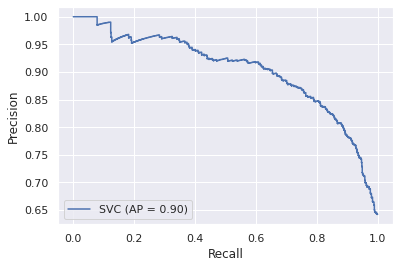

In [43]:
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(reg, X_test, y_test)

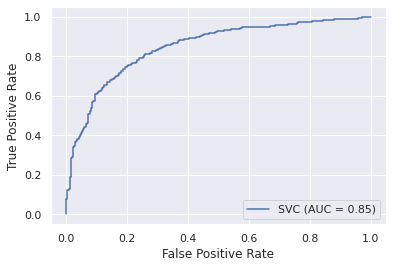

In [44]:
plot=plot_roc_curve(reg,X_test,y_test)

In [45]:
from sklearn.neighbors import KNeighborsClassifier
reg=KNeighborsClassifier(n_neighbors=2)
reg.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [46]:
y_pred=reg.predict(X_test)

In [47]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
c=confusion_matrix(y_pred,y_test)
a=accuracy_score(y_pred,y_test)
r=classification_report(y_pred,y_test)
print(r,c,a)

              precision    recall  f1-score   support

           1       0.78      0.60      0.68       616
           2       0.70      0.85      0.77       684

    accuracy                           0.73      1300
   macro avg       0.74      0.72      0.72      1300
weighted avg       0.74      0.73      0.73      1300
 [[368 248]
 [102 582]] 0.7307692307692307


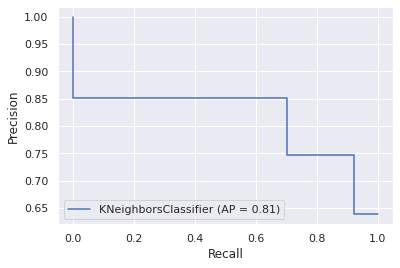

In [48]:
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(reg, X_test, y_test)

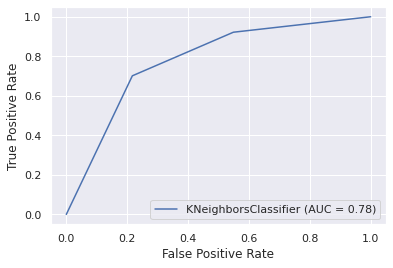

In [49]:
plot=plot_roc_curve(reg,X_test,y_test)

In [50]:
from sklearn.tree import DecisionTreeClassifier
reg=DecisionTreeClassifier()
reg.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [51]:
y_pred=reg.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
c=confusion_matrix(y_pred,y_test)
a=accuracy_score(y_pred,y_test)
r=classification_report(y_pred,y_test)
print(r,c,a)

              precision    recall  f1-score   support

           1       0.69      0.73      0.71       448
           2       0.85      0.83      0.84       852

    accuracy                           0.80      1300
   macro avg       0.77      0.78      0.78      1300
weighted avg       0.80      0.80      0.80      1300
 [[326 122]
 [144 708]] 0.7953846153846154


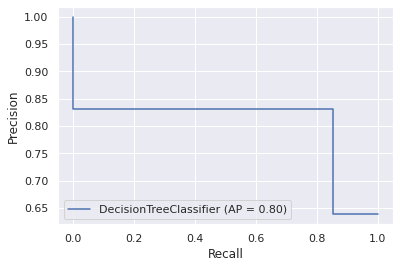

In [53]:
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(reg, X_test, y_test)

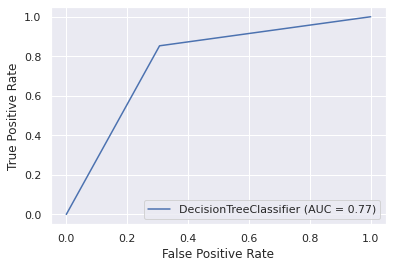

In [54]:
plot=plot_roc_curve(reg,X_test,y_test)

In [55]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
y_pred=reg.predict(X_test)

In [57]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
c=confusion_matrix(y_pred,y_test)
a=accuracy_score(y_pred,y_test)
r=classification_report(y_pred,y_test)
print(r,c,a)

              precision    recall  f1-score   support

           1       0.61      0.68      0.64       417
           2       0.84      0.79      0.81       883

    accuracy                           0.76      1300
   macro avg       0.72      0.74      0.73      1300
weighted avg       0.77      0.76      0.76      1300
 [[285 132]
 [185 698]] 0.7561538461538462


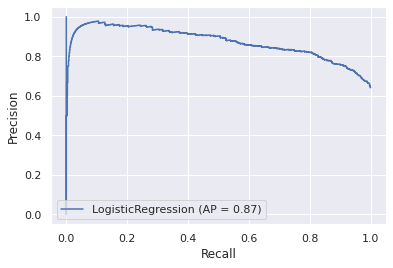

In [58]:
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(reg, X_test, y_test)

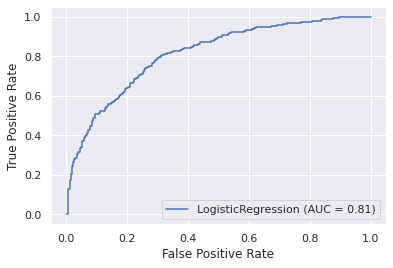

In [59]:
plot=plot_roc_curve(reg,X_test,y_test)

In [412]:
from sklearn.ensemble import RandomForestClassifier
reg=RandomForestClassifier(criterion='entropy',random_state=0)
reg.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [413]:
y_pred=reg.predict(X_test)

In [414]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
c=confusion_matrix(y_pred,y_test)
a=accuracy_score(y_pred,y_test)
r=classification_report(y_pred,y_test)
print(a)

0.8376923076923077


In [415]:
print(c)

[[340  81]
 [130 749]]


In [416]:
print(r)

              precision    recall  f1-score   support

           1       0.72      0.81      0.76       421
           2       0.90      0.85      0.88       879

    accuracy                           0.84      1300
   macro avg       0.81      0.83      0.82      1300
weighted avg       0.84      0.84      0.84      1300



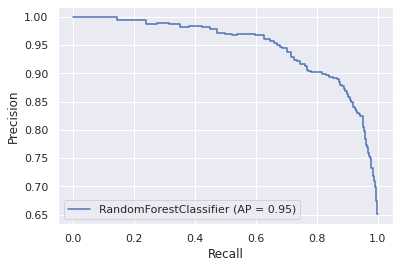

In [38]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve
disp = plot_precision_recall_curve(reg, X_test, y_test)

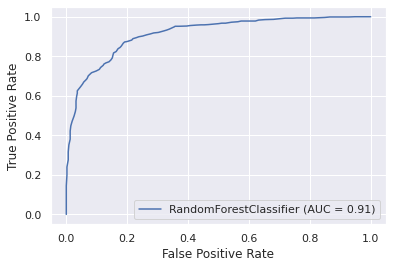

In [39]:
plot=plot_roc_curve(reg,X_test,y_test)

### RandomizeSearch CV

In [300]:
n_estimators=[100,200,300,400,400,600,800,900,1000]
max_features=['auto','sqrt','log2']
max_depth=[int (x) for x in np.linspace(10,1000,10)]
min_samples_split=[1,3,4,5,7,9]
min_samples_leaf=[1,2,4,6,8]
criterion=['gini','entropy']

random_grid={
              'criterion':criterion,
              'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf
            }
print(random_grid)

{'criterion': ['gini', 'entropy'], 'n_estimators': [100, 200, 300, 400, 400, 600, 800, 900, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [1, 3, 4, 5, 7, 9], 'min_samples_leaf': [1, 2, 4, 6, 8]}


In [302]:
from sklearn.model_selection import RandomizedSearchCV
rf=RandomForestClassifier()
random_cv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,n_jobs=-1,verbose=3,scoring='accuracy')
random_cv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 12.5min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [311]:
random_cv.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=890, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [360]:
best_param=random_cv.best_estimator_
best_param=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0,
                       verbose=0, warm_start=False)
best_param.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [361]:
y_pred=best_param.predict(X_test)
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))


[[347  80]
 [123 750]]
0.8438461538461538
              precision    recall  f1-score   support

           1       0.74      0.81      0.77       427
           2       0.90      0.86      0.88       873

    accuracy                           0.84      1300
   macro avg       0.82      0.84      0.83      1300
weighted avg       0.85      0.84      0.85      1300



In [362]:
random_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 890,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 300}

### Grid Search CV

In [317]:
from sklearn.model_selection import GridSearchCV
criterion=['entropy']
param_grid_s={
            'criterion':criterion,
            'max_features':[random_cv.best_params_['max_features']],
            'min_samples_leaf':[random_cv.best_params_['min_samples_leaf'],
                                random_cv.best_params_['min_samples_leaf']+1,
                                random_cv.best_params_['min_samples_leaf']+2],
            'min_samples_split':[random_cv.best_params_['min_samples_split']-2,
                                 random_cv.best_params_['min_samples_split']-1,
                                 random_cv.best_params_['min_samples_split'],
                                 random_cv.best_params_['min_samples_split']+1,
                                 random_cv.best_params_['min_samples_split']+2],
            'n_estimators':[random_cv.best_params_['n_estimators']-50,
                            random_cv.best_params_['n_estimators']-25,
                            random_cv.best_params_['n_estimators'],
                            random_cv.best_params_['n_estimators']+25,
                            random_cv.best_params_['n_estimators']+50]
            }
print(param_grid_s)

{'criterion': ['entropy'], 'max_features': ['auto'], 'min_samples_leaf': [1, 2, 3], 'min_samples_split': [3, 4, 5, 6, 7], 'n_estimators': [250, 275, 300, 325, 350]}


In [318]:
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid_s,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 26.2min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed: 30.3min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [359]:
print(grid_search.best_score_)
print(grid_search.best_estimator_)

0.8270171928264413
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [352]:
best_params=grid_search.best_estimator_
best_params=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=287,
                       n_jobs=None, oob_score=False, random_state=0,
                       verbose=0, warm_start=False)
best_params.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=287,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [353]:
y_pred=best_params.predict(X_test)
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[348  79]
 [122 751]]
0.8453846153846154
              precision    recall  f1-score   support

           1       0.74      0.81      0.78       427
           2       0.90      0.86      0.88       873

    accuracy                           0.85      1300
   macro avg       0.82      0.84      0.83      1300
weighted avg       0.85      0.85      0.85      1300



In [364]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 300}

In [84]:
'''data=dataset.copy()
data=pd.concat([dataset[['type','quality']].reset_index(drop=True),
               pd.DataFrame(mms.transform(dataset[feature_scale]),columns=feature_scale)],axis=1)'''

"data=dataset.copy()\ndata=pd.concat([dataset[['type','quality']].reset_index(drop=True),\n               pd.DataFrame(mms.transform(dataset[feature_scale]),columns=feature_scale)],axis=1)"